# ScRNA-Seq of human bone marrow cells from Oetjen et al.

Inspired by the work of [Luecken, MD. et al.](https://www.nature.com/articles/s41592-021-01336-8#Sec35)
<br>Code: https://github.com/theislab/scib-reproducibility/tree/main 
<br>
<br>Data from [Oetjen, KA. et al.](https://insight.jci.org/articles/view/124928)
<br>Data: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM3396161 

In [10]:
# Import packages
import scanpy as sc
import numpy as np
import scipy as sp
from scipy.sparse import csr_matrix, issparse
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
from functions import data_preprocessing as dp
import seaborn as sb
import random
import warnings
import logging
import json

warnings.filterwarnings("ignore", category=FutureWarning)

## Add cell type labels

In [11]:
norm_qc_adata = sc.read_h5ad("BM_1_adata.h5ad")
labels = pd.read_csv("BM_1_labels.txt")
labels.shape

(2311, 1)

In [12]:
norm_qc_adata.obs["cell_type"] = list(labels.iloc[:,0])

In [13]:
norm_qc_adata

AnnData object with n_obs × n_vars = 2311 × 12438
    obs: 'tissue', 'age', 'treatment_protocol', 'method', 'instrument', 'n_counts', 'log_n_counts', 'n_genes', 'log_n_genes', 'pct_counts_in_top_20_genes', 'mt_frac', 'outlier', 'size_factors', 'cell_type'
    var: 'gene_id', 'n_cells'
    layers: 'counts', 'log1p_counts'

## Visualize

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


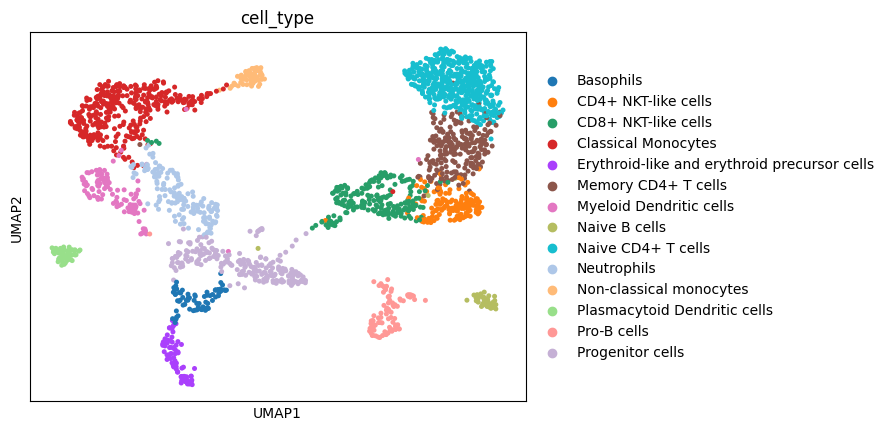

In [14]:
sc.pp.highly_variable_genes(norm_qc_adata, n_top_genes=4000, flavor="cell_ranger")
sc.pp.pca(norm_qc_adata, n_comps=20, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(norm_qc_adata)
sc.tl.umap(norm_qc_adata)
sc.pl.umap(norm_qc_adata, color='cell_type')

## Download processed data, including labels

In [15]:
norm_qc_adata.write("../../../../../data/processed/immune_cells/bone_marrow_human/BM_1_adata.h5ad")

In [16]:
import os

os.remove("BM_1.csv")
os.remove("BM_1_adata.h5ad")
os.remove("BM_1_labels.txt")